# Setup

In [66]:
# Import packages
import pandas as pd
from ds_common_utils.aux.io.snowflake_tools import SnowflakeTools
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Setup connection
con = SnowflakeTools(
    role="INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD",
    warehouse="INSIGHT_ANALYST_WH",
    database="BDWPRD_DE",
    schema="IA_MERCH_DE"
)

In [28]:
# Date range
start_date = "'2024-06-18'"
end_date = "'2025-06-18'"

In [109]:
# Updated function with `field` for demographic segment and `level` for groupings like sub-department

def generate_segment_charts(df, field, level):
    sub_charts = {}
    segment_order = df[field].drop_duplicates().tolist()

    for group_val in df[level].drop_duplicates():
        df_sub = df[df[level] == group_val].copy()

        df_sub[field] = pd.Categorical(df_sub[field], categories=segment_order, ordered=True)
        df_sub.sort_values(field, inplace=True)

        def get_color(index):
            if index > 1.2:
                return "green"
            elif index < 0.8:
                return "red"
            else:
                return "grey"

        colors = df_sub["SALES_INDEX"].apply(get_color)

        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.barh(range(len(df_sub)), df_sub["SEGMENT_SALES"] / 1e6, color=colors)

        ax.set_yticks(range(len(df_sub)))
        ax.set_yticklabels(df_sub[field])

        for i, bar in enumerate(bars):
            idx_val = df_sub.iloc[i]["SALES_INDEX"]
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{idx_val:.2f}",
                    va='center', ha='left', fontsize=10, color=colors.iloc[i])

        ax.set_title(f"Sales by {field}\n{group_val}")
        ax.set_xlabel("Sales ($M)")

        # Only keep left and bottom borders
        for spine_name in ["top", "right"]:
            ax.spines[spine_name].set_visible(False)

        plt.tight_layout()
        sub_charts[group_val] = fig

    return sub_charts

# 300 PEST CONTROL

## Data

In [48]:
# Set item range table name
table_PC = 'PC_item_range' + datetime.today().strftime('%Y_%m_%d')

In [49]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_PC,
                'filter' : "AND item_department_name = '300 PEST CONTROL' "})

## Demographic Segments (AU)

In [76]:
PC_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [77]:
# Check data
PC_ds.head()

,ITEM_SUB_DEPARTMENT_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,Homeowner older kids,140926.56,6477.0,4698,2001818.1,93473.0,66830,4449259.77,375569.0,...,1638034,0.070399,0.069293,0.070298,0.080041,0.077803,0.076057,0.879544,0.890623,0.924280
1,400 ANIMAL CONTROL,Homeowner younger kids,286719.52,12851.0,9348,2001818.1,93473.0,66830,9917919.45,810777.0,...,1638034,0.143230,0.137484,0.139877,0.178420,0.167960,0.162526,0.802766,0.818550,0.860644
2,400 ANIMAL CONTROL,Older homeowner,1091867.28,51901.0,36421,2001818.1,93473.0,66830,24655586.70,2188314.0,...,1638034,0.545438,0.555251,0.544980,0.443546,0.453329,0.436019,1.229722,1.224830,1.249900
3,400 ANIMAL CONTROL,Renter no kids,117932.18,5506.0,4227,2001818.1,93473.0,66830,4806602.40,441684.0,...,1638034,0.058913,0.058905,0.063250,0.086469,0.091499,0.112453,0.681313,0.643775,0.562457
4,400 ANIMAL CONTROL,Renter with kids,107498.85,4928.0,3736,2001818.1,93473.0,66830,4392593.77,395524.0,...,1638034,0.053701,0.052721,0.055903,0.079021,0.081936,0.091257,0.679571,0.643439,0.612589


/tmp/ipykernel_832/3762611785.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

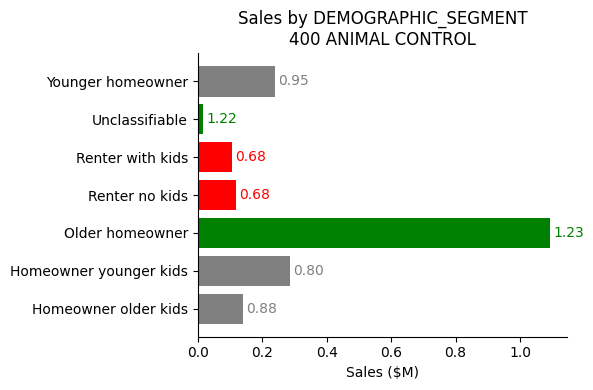

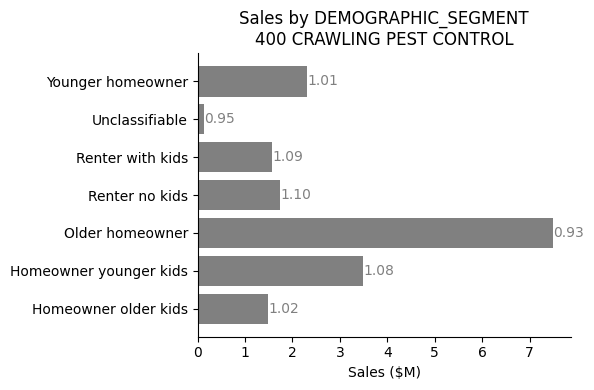

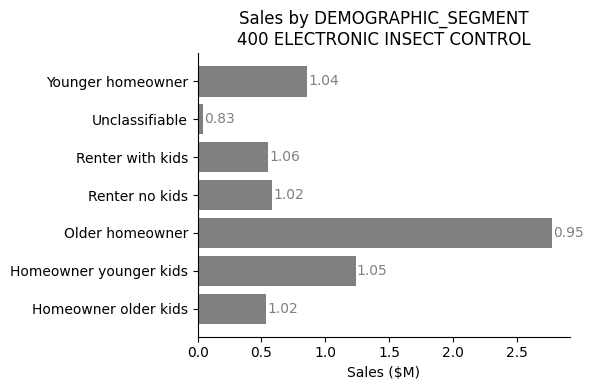

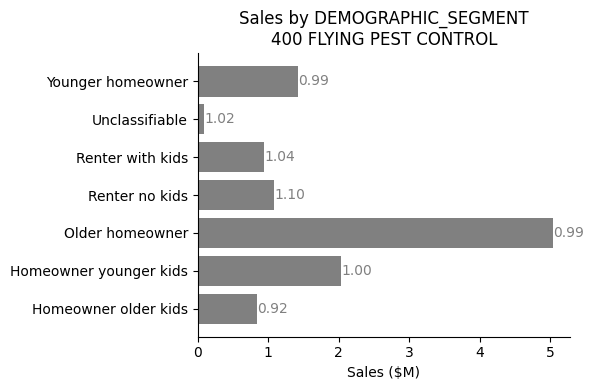

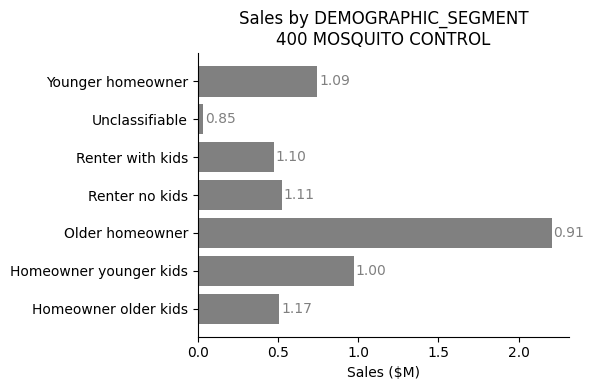

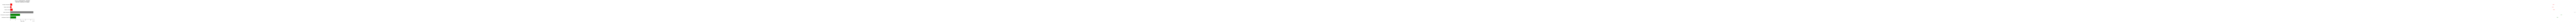

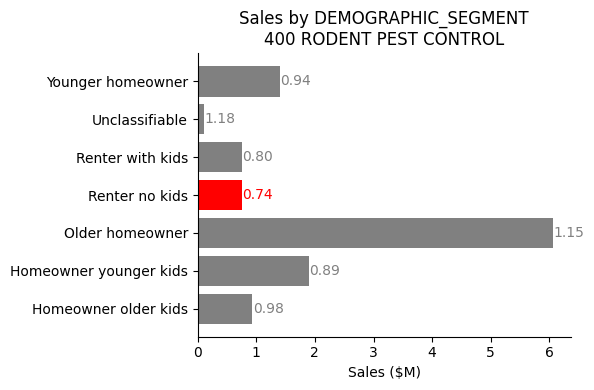

In [111]:
generate_segment_charts(df=PC_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

# 400 GROWING MEDIA

## Data

In [104]:
# Set item range table name
table_GM = 'GM_item_range' + datetime.today().strftime('%Y_%m_%d')

In [105]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_GM,
                'filter' : "AND item_sub_department_name = '400 GROWING MEDIA' "})

## Demographic Segments (AU)

In [106]:
GM_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [107]:
# Check data
GM_ds.head()

,ITEM_CLASS_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,Homeowner older kids,95343.27,5026.0,2539,1156711.04,60566.0,30363,11704165.06,1370137.0,...,2588230,0.082426,0.082984,0.083622,0.072791,0.073861,0.074007,1.132362,1.123509,1.129920
1,500 COIR MULCH BLOCK HYDRO,Homeowner younger kids,182255.80,9618.0,4955,1156711.04,60566.0,30363,22054003.49,2612429.0,...,2588230,0.157564,0.158802,0.163192,0.137160,0.140831,0.141784,1.148761,1.127608,1.150990
2,500 COIR MULCH BLOCK HYDRO,Older homeowner,544058.84,27742.0,13308,1156711.04,60566.0,30363,87862988.40,10005621.0,...,2588230,0.470350,0.458046,0.438297,0.546443,0.539383,0.487792,0.860748,0.849203,0.898533
3,500 COIR MULCH BLOCK HYDRO,Renter no kids,82819.23,4639.0,2820,1156711.04,60566.0,30363,9113185.80,1084036.0,...,2588230,0.071599,0.076594,0.092876,0.056677,0.058438,0.103687,1.263272,1.310686,0.895734
4,500 COIR MULCH BLOCK HYDRO,Renter with kids,45328.37,2569.0,1607,1156711.04,60566.0,30363,5489698.28,677855.0,...,2588230,0.039187,0.042417,0.052926,0.034142,0.036542,0.065604,1.147777,1.160768,0.806750


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

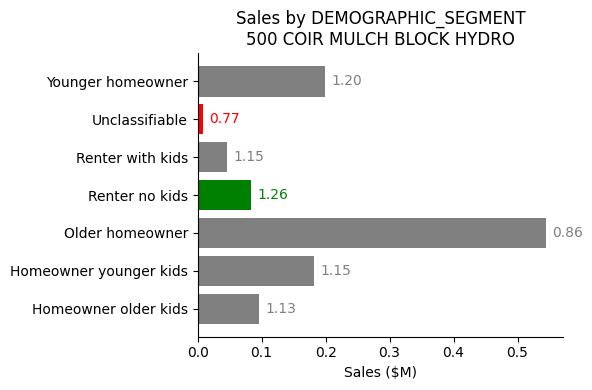

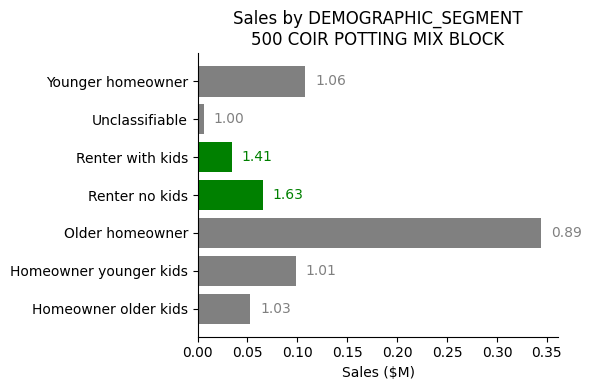

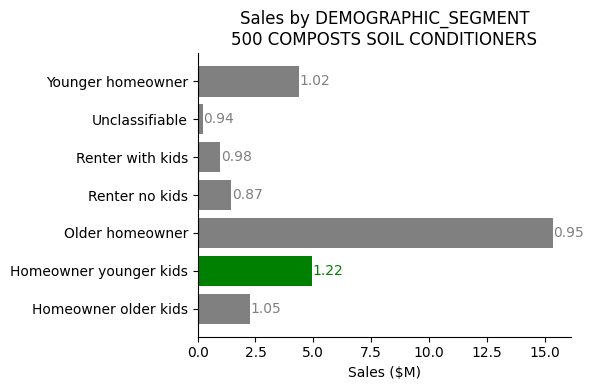

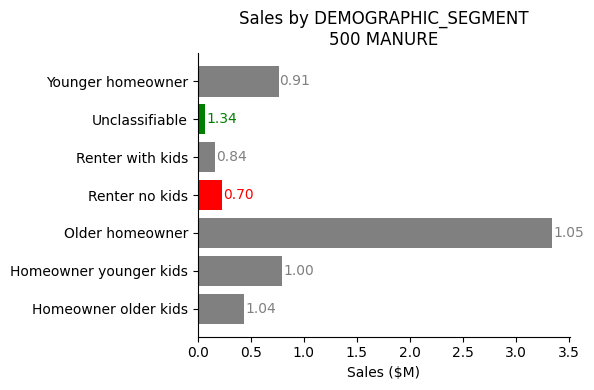

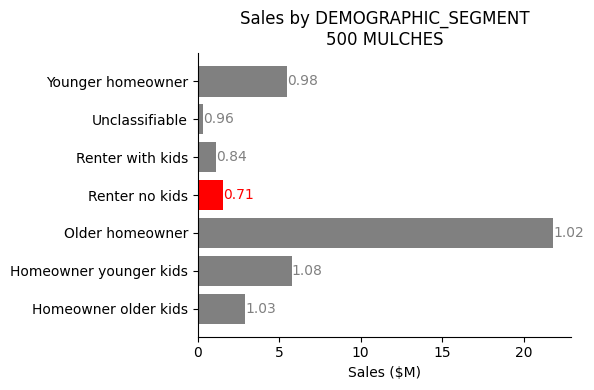

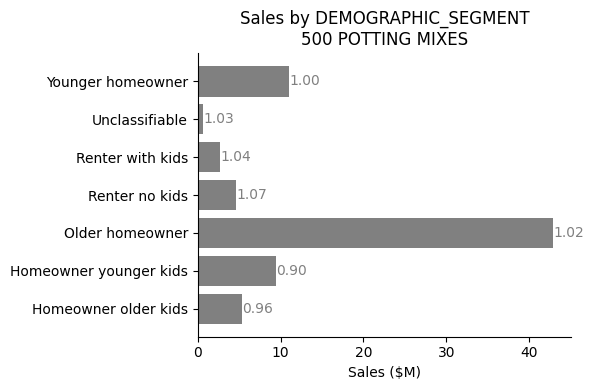

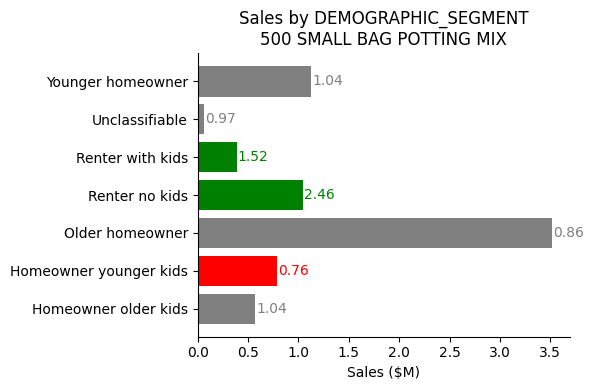

In [113]:
generate_segment_charts(df=GM_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_CLASS_NAME")

## DIY

In [8]:
# Get data
GM_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM
    }
)

In [9]:
# Check data
GM_diy

,PROFICIENCY_GROUP,RANGE_SALES,RANGE_QUANTITY,RANGE_CUSTOMERS,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,RANGE_CUSTOMER_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_CUSTOMERS,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,1. DIY Master,1981186.23,23530.0,1658,0.551451,0.552309,0.570151,1.163841e+09,71949415.0,964468,0.314010,0.293764,0.210648,1.756158,1.880109,2.706653
1,2. DIY Skilled,919603.24,10859.0,727,0.255966,0.254888,0.250000,1.033219e+09,67424607.0,1225228,0.278767,0.275290,0.267600,0.918206,0.925891,0.934230
2,3. DIY Maintainer,446461.90,5300.0,352,0.124270,0.124404,0.121045,8.555480e+08,58279220.0,1226056,0.230831,0.237950,0.267781,0.538359,0.522818,0.452030
3,4. DIY Rookie,245426.64,2914.0,171,0.068313,0.068399,0.058803,6.537751e+08,47269163.0,1162828,0.176392,0.192996,0.253971,0.387280,0.354405,0.231534


## RFM (Annual Segment)

In [10]:
# Get data
GM_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM
    }
)

In [11]:
# Check data
GM_rfm

,ANNUAL_SEGMENT,RANGE_SALES,RANGE_QUANTITY,RANGE_CUSTOMERS,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,RANGE_CUSTOMER_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_CUSTOMERS,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,High Spend High Frequency,3039025.95,36023.0,2412,0.771626,0.771304,0.769378,2.417657e+09,153470539.0,1389068,0.586034,0.565179,0.263189,1.316691,1.364709,2.923291
1,High Spend Low Frequency,543486.67,6479.0,399,0.137994,0.138725,0.127273,7.627374e+08,43530320.0,1284405,0.184886,0.160307,0.243358,0.746377,0.865369,0.522987
2,Low Spend High Frequency,206133.75,2484.0,200,0.052339,0.053186,0.063796,5.007405e+08,41692067.0,787133,0.121378,0.153537,0.149139,0.431202,0.346404,0.427762
3,Low Spend Low Frequency,149823.57,1718.0,124,0.038041,0.036785,0.039553,4.443183e+08,32850443.0,1817235,0.107702,0.120977,0.344314,0.353208,0.304065,0.114875


### Commercial BOT

In [12]:
# Get data
GM_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM
    }
)

In [13]:
# Check data
GM_bot

,COMMERCIAL_INDUSTRY_SEGMENT_REPORT_GROUP_CODE,RANGE_SALES,RANGE_QUANTITY,RANGE_CUSTOMERS,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,RANGE_CUSTOMER_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_CUSTOMERS,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,B&O,15083597.05,197324.0,5521,0.268600,0.267521,0.315973,2.201105e+09,122771087.0,538361,0.374803,0.393591,0.508170,0.716642,0.679694,0.621786
1,Builder,23653019.42,313654.0,6048,0.421199,0.425235,0.346134,1.915227e+09,91116091.0,146239,0.326124,0.292108,0.138038,1.291529,1.455746,2.507527
2,Trades,17419834.40,226623.0,5904,0.310202,0.307243,0.337893,1.760491e+09,98037273.0,374811,0.299776,0.314297,0.353792,1.034780,0.977558,0.955061
3,Unknown,NaN,NaN,0,NaN,NaN,0.000000,-4.126597e+06,1295.0,1,-0.000703,0.000004,0.000001,NaN,NaN,0.000000


### Commercial Industry Segment

In [14]:
# Get data
GM_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 25, # Can change, 25-40 recommended otherwise additional segments are too small
        'table_name': table_GM
    }
)

In [15]:
# Check data
GM_is.sort_values(by='SALES_INDEX', ascending=False)

,COMMERCIAL_INDUSTRY_SEGMENT_CODE,RANGE_SALES,RANGE_QUANTITY,RANGE_CUSTOMERS,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,RANGE_CUSTOMER_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_CUSTOMERS,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
2,Carpentry Services,7746647.48,101461.0,2201,0.145537,0.145108,0.134199,3.560253e+08,17328440.0,53133,0.066116,0.060797,0.055513,2.201240,2.386779,2.417434
5,Construction Services,3261790.06,43700.0,882,0.061280,0.062499,0.053777,2.322027e+08,13311173.0,34740,0.043121,0.046702,0.036296,1.421095,1.338251,1.481623
4,Commercial Builder,6133881.51,81254.0,1708,0.115238,0.116208,0.104140,4.400248e+08,20389615.0,29320,0.081715,0.071537,0.030633,1.410239,1.624457,3.399602
10,Landscaper and Gardening Services,3155882.10,40764.0,987,0.059290,0.058300,0.060179,2.409719e+08,16283854.0,49256,0.044750,0.057132,0.051462,1.324917,1.020451,1.169387
19,Residential Builder,11908064.36,158015.0,2778,0.223718,0.225991,0.169380,9.991685e+08,44758034.0,51179,0.185552,0.157033,0.053472,1.205693,1.439129,3.167639
21,Site Preparation and Development,2349283.49,30685.0,680,0.044136,0.043885,0.041461,2.438310e+08,12657269.0,31000,0.045281,0.044408,0.032389,0.974722,0.988231,1.280095
8,Financial and Insurance Services,866976.75,11378.0,321,0.016288,0.016273,0.019572,1.026293e+08,5646607.0,28327,0.019059,0.019811,0.029596,0.854615,0.821393,0.661306
16,Professional Computer and Scientific Services,3496643.84,45316.0,1301,0.065692,0.064810,0.079324,4.657070e+08,25792940.0,125335,0.086485,0.090494,0.130949,0.759579,0.716182,0.605763
3,Cleaning Services,1463799.09,18811.0,632,0.027501,0.026903,0.038534,1.972596e+08,11331920.0,43241,0.036632,0.039758,0.045178,0.750720,0.676676,0.852937
12,Owner Builder,563598.08,7262.0,246,0.010588,0.010386,0.014999,7.628366e+07,4006455.0,19688,0.014166,0.014057,0.020570,0.747433,0.738871,0.729169


### Location

In [16]:
# Get data
GM_loc = con.read_sql_file_into_pandas(
    file="sql/6-location.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM
    }
)

In [17]:
# Check data
GM_loc.sort_values(by='SALES_INDEX', ascending=False)

,LOCATION_NAME,RANGE_SALES,RANGE_QUANTITY,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,SALES_INDEX,QUANTITY_INDEX
200,Maroochydore Trade Centre,586768.00,7983.0,0.008617,0.009074,11967201.60,417777.0,0.000752,4.232677e-04,11.458507,21.437469
217,Mitchell Trade Centre,409760.90,5436.0,0.006017,0.006179,9208233.83,316111.0,0.000579,3.202655e-04,10.399403,19.292643
72,Cameron Park Trade Centre,505543.55,7020.0,0.007424,0.007979,11544576.45,393973.0,0.000725,3.991508e-04,10.233750,19.990449
99,Cromer Trade Centre,320405.92,4152.0,0.004705,0.004719,8534033.68,263842.0,0.000536,2.673096e-04,8.774056,17.654902
335,Tuggerah Trade Centre,465465.78,6386.0,0.006835,0.007259,12676985.36,381066.0,0.000797,3.860742e-04,8.580765,18.800986
...,...,...,...,...,...,...,...,...,...,...,...
340,Unanderra F&T,NaN,NaN,NaN,NaN,11789014.51,1653.0,0.000741,1.674720e-06,NaN,NaN
349,WA Support Centre Cafe,NaN,NaN,NaN,NaN,204243.28,82037.0,0.000013,8.311518e-05,NaN,NaN
350,Wacol F&T,NaN,NaN,NaN,NaN,8133351.14,838.0,0.000511,8.490100e-07,NaN,NaN
355,Warnervale F&T,NaN,NaN,NaN,NaN,19991586.37,2552.0,0.001256,2.585540e-06,NaN,NaN


### Location Region

In [18]:
# Get data
GM_reg = con.read_sql_file_into_pandas(
    file="sql/7-location-region.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM
    }
)

In [19]:
# Check data
GM_reg

,LOCATION_REGION_NAME,RANGE_SALES,RANGE_QUANTITY,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,SALES_INDEX,QUANTITY_INDEX
0,East Division,23792714.48,306336.0,0.349394,0.348193,4.319151e+09,261698214.0,0.271404,0.265138,1.287360,1.313255
1,North Division,17159536.79,221782.0,0.251987,0.252086,4.350527e+09,264063594.0,0.273375,0.267534,0.921760,0.942258
2,South Division,16325037.36,211021.0,0.239732,0.239855,4.191870e+09,263808733.0,0.263406,0.267276,0.910124,0.897405
3,Trade Strategies,NaN,NaN,NaN,NaN,2.876440e+07,141824.0,0.001807,0.000144,NaN,NaN
4,West Division,10819734.28,140648.0,0.158887,0.159866,3.023797e+09,197315563.0,0.190007,0.199909,0.836215,0.799695


### Metro/Regional

In [20]:
# Get data
GM_mr = con.read_sql_file_into_pandas(
    file="sql/8-location-metro-regional.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM
    }
)

In [21]:
# Check data
GM_mr

,TRADE_REGION_CODE,RANGE_SALES,RANGE_QUANTITY,RANGE_SALES_SHARE,RANGE_QUANTITY_SHARE,OVERALL_SALES,OVERALL_QUANTITY,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,SALES_INDEX,QUANTITY_INDEX
0,Metro,48207478.23,622159.0,0.707923,0.70717,1.190340e+10,747412725.0,0.747977,0.757236,0.94645,0.933884
1,Regional,19889544.68,257628.0,0.292077,0.29283,4.010714e+09,239615203.0,0.252023,0.242764,1.15893,1.206231


### Drop item range table

In [22]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_GM}
    )